# Problem Session 7
## Classifying Cancer I

In this notebook you will work with a cancer data set that can be found here, <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29">https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29</a>. Specifically we will introduce the data, perform some EDA and build a couple of models.

The problems in this notebook will cover the content covered in our `Classification` notebooks including:
- `Adjustments for Classification`,
- `k Nearest Neighbors`,
- `The Confusion Matrix` and
- `Logistic Regression`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

##### 1. Load the data.

The data for this problem is stored in `sklearn`, here is the documentation page for that, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html">https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html</a>.

Run this code chunk to load in the data.

Use `np.unique`, <a href="https://numpy.org/doc/stable/reference/generated/numpy.unique.html">https://numpy.org/doc/stable/reference/generated/numpy.unique.html</a> to see the split between `0` and `1` in the data set. Then perform a stratified train test split.

Note we will flip the labels of the data because `sklearn` confusingly uses `0` for malignant tumors and `1` for benign tumors.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
## Loads the data from sklearn 
cancer = load_breast_cancer(as_frame=True)

## the 'data' entry contains the features
X = cancer['data']

## the 'target' entry contains what we would like to predict
y = cancer['target']

## Chaning the labels around
y = -y + 1

In [4]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [5]:
print("y takes on the values 0 and 1", np.unique(y))
print("with a", np.unique(y, return_counts=True)[1]/len(y), "split.")

y takes on the values 0 and 1 [0 1]
with a [0.62741652 0.37258348] split.


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.copy(),y,
                                                       shuffle=True,
                                                       random_state=214,
                                                       stratify=y,
                                                       test_size=.2)

##### 2. Learn how the data were generated

Read through the following:

In this problem you will build a model to predict whether or not a tumor is malignant ($y=0$) or benign ($y=1$).

The features you will use to predict this model are a selection of measurments from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. An FNA of breast mass looks something like this:

<img src="fna_img.png" width="60%"></img>

<i>Source: Nuclear Feature Extraction For Breast Tumor Diagnosis, W. Nick Street, William H. Wolberg and O.L. Mangasarian, Center for Parallel Optimization, Computer Sciences Technical Report #1131 (1992). <a href="https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf?sequence=1">https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf?sequence=1</a>.</i>

For each FNA we have the mean, error and worst measurements of the following features:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

##### 3. Choosing an appropriate performance metric

Consider the goal of this "project", we want to determine if an FNA is an image of a malignant or benign tumor. Is accuracy an appropriate metric for choosing a model here? Why or why not? 

If accuracy is not appropriate, what are some good alternatives? Select a performance metric (or metrics) for the models you will build later and give a reason why.

##### Potential Answer

I would say that the accuracy of a model is not necessarily the best measure for this problem. When it comes to diagnosing cancer, we care about how we are correct and how we are wrong. 

You could reasonably argue that both detecting cancer when it is present is important, which could be measured by the true positive rate, as well as not wanting to falsely predict that someone has cancer when they do not which could cause emotional distress, which could be measured by the false positive rate.

Reasonable metrics to choose would thus be:
- True positive rate,
- False positive rate or
- Precision.

##### 4. Exploratory Data Analysis

- Make histograms of each feature, split by the value of $y$
- Make some scatter plots colored by the value of $y$, note, don't try to make all of the possible scatter plots, there are 30 total features so there are 30 choose 2 = 435 possible scatter plots to examine.

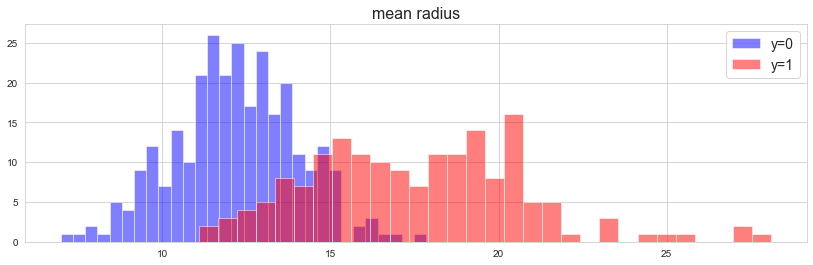

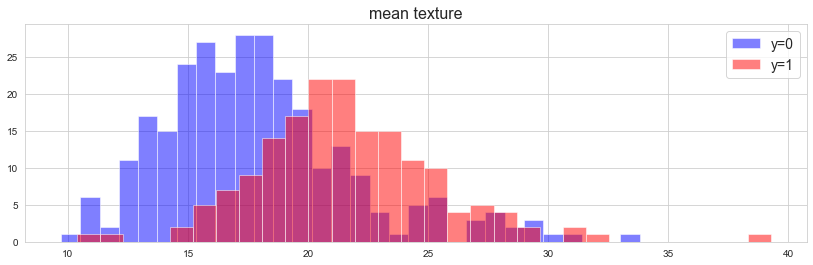

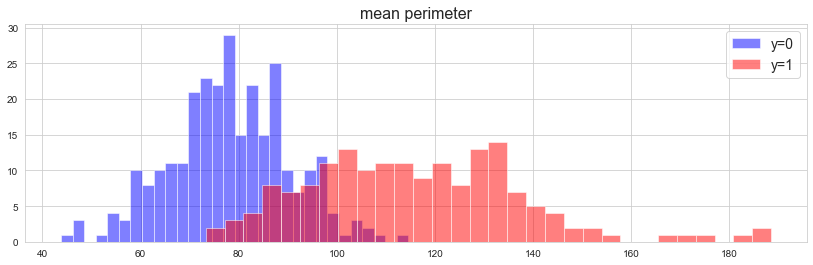

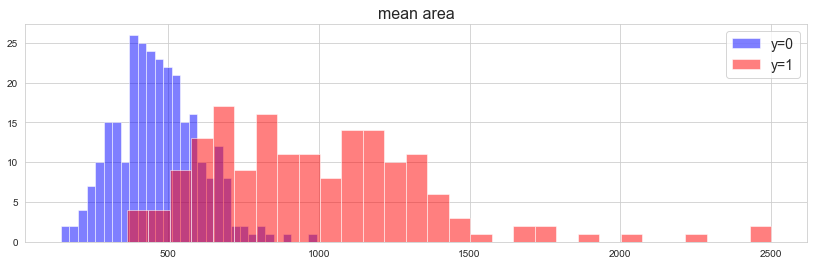

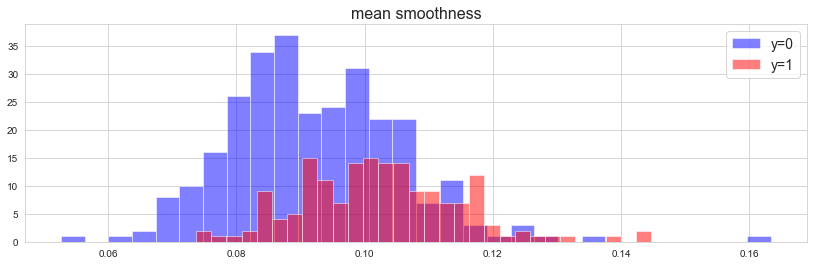

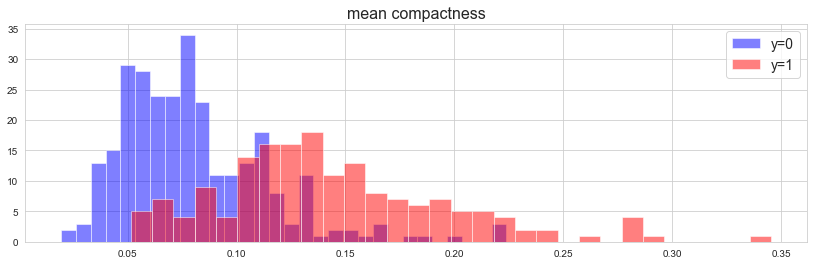

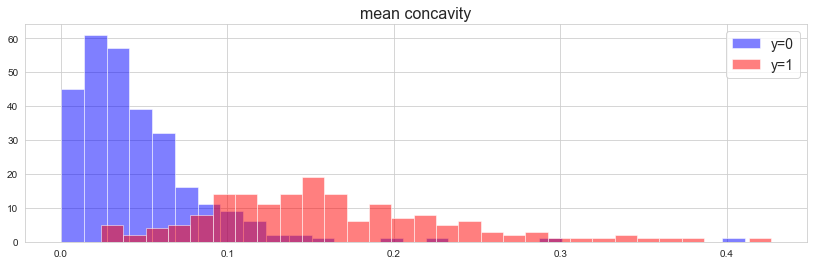

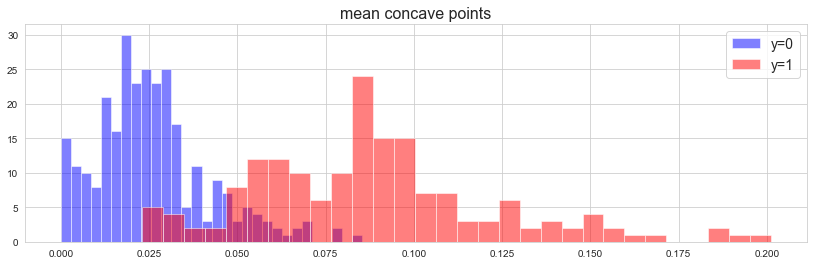

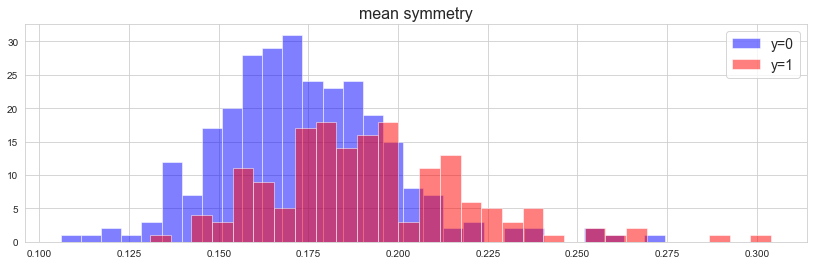

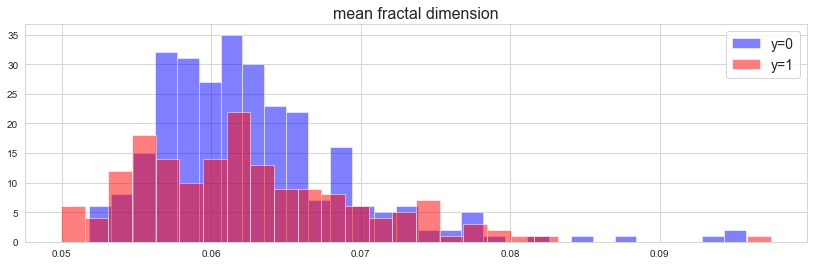

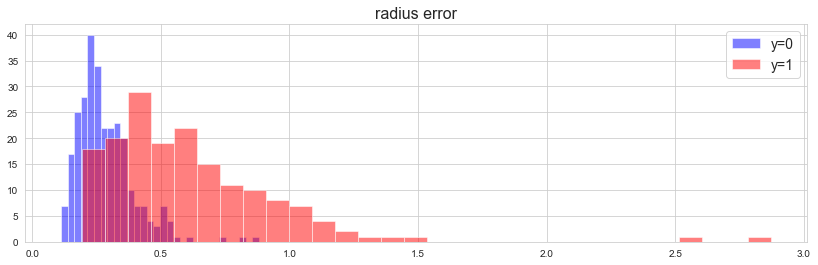

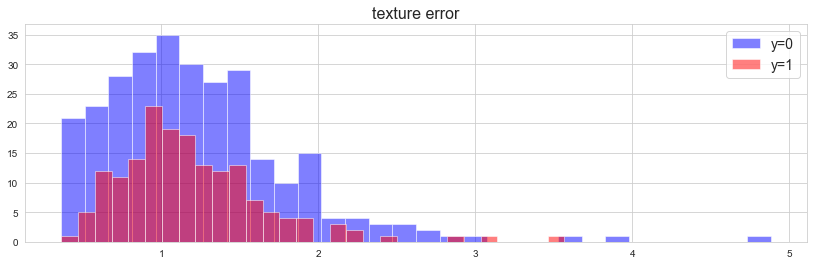

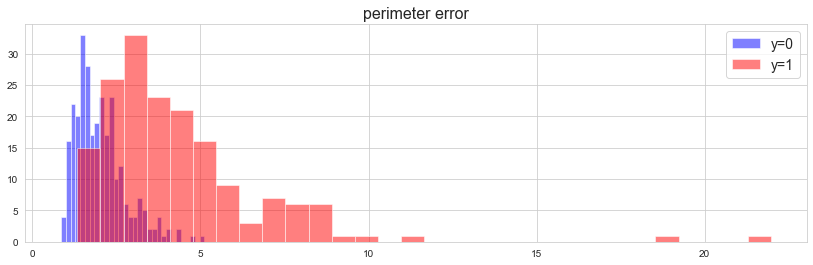

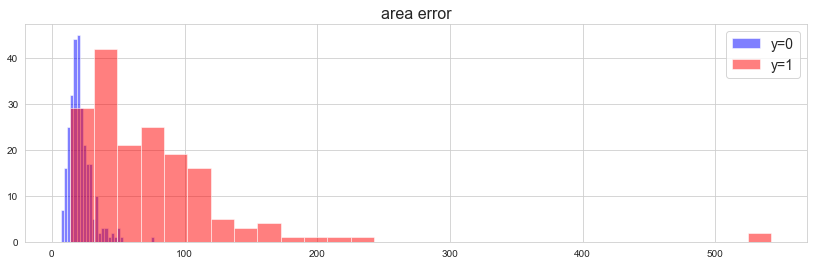

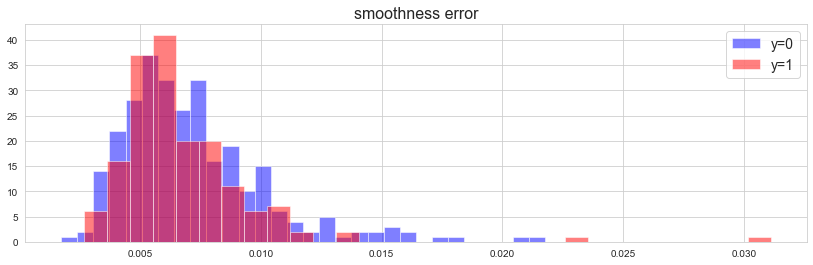

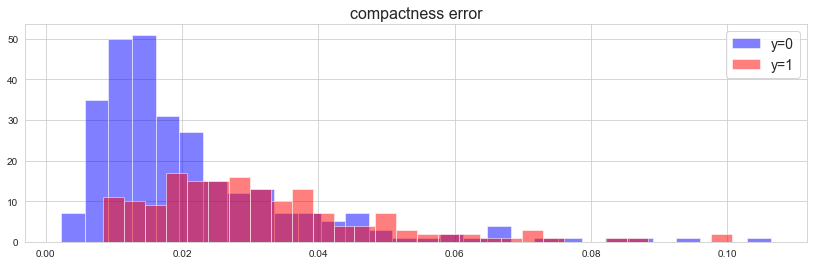

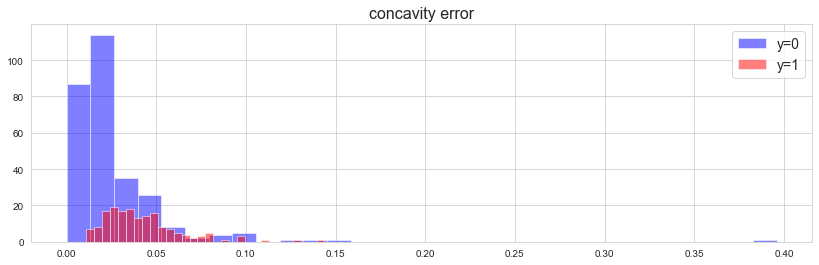

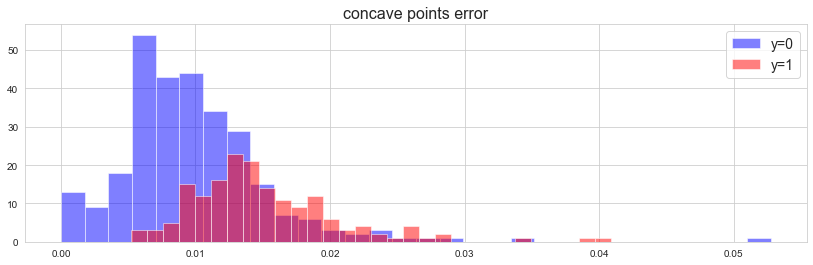

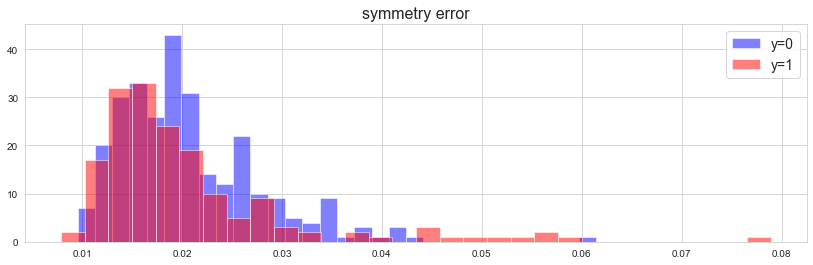

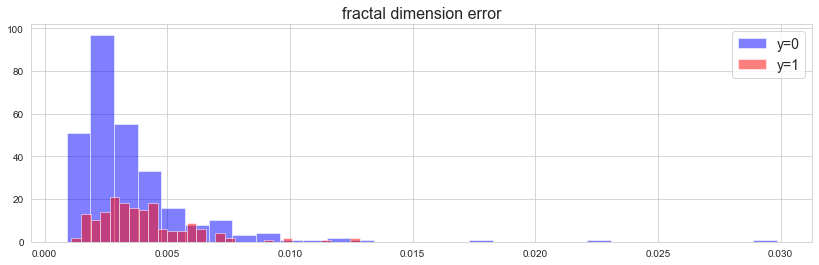

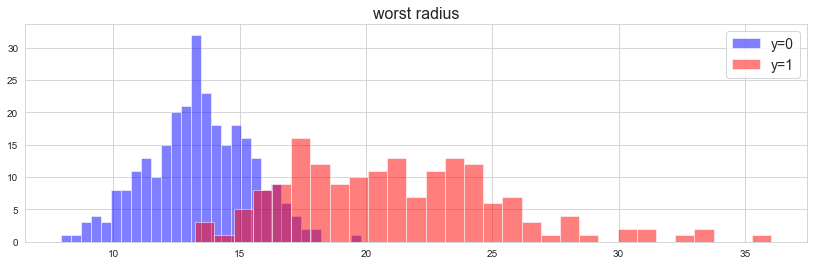

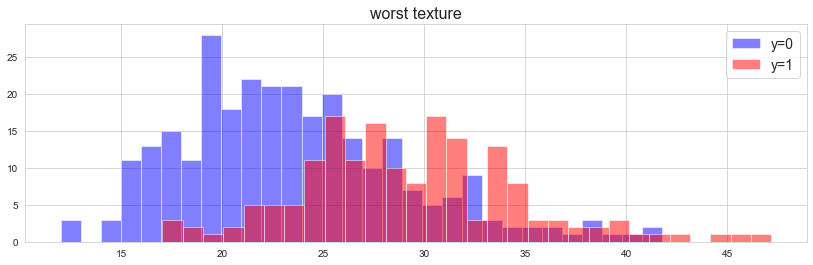

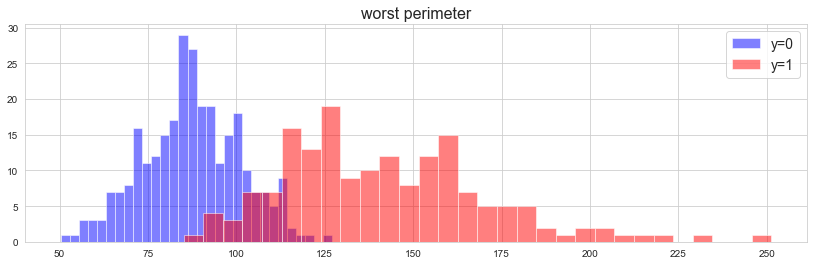

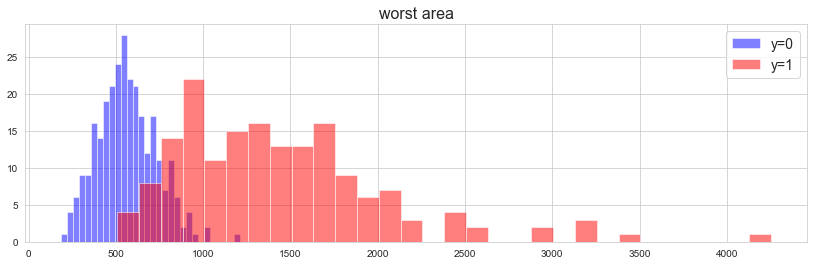

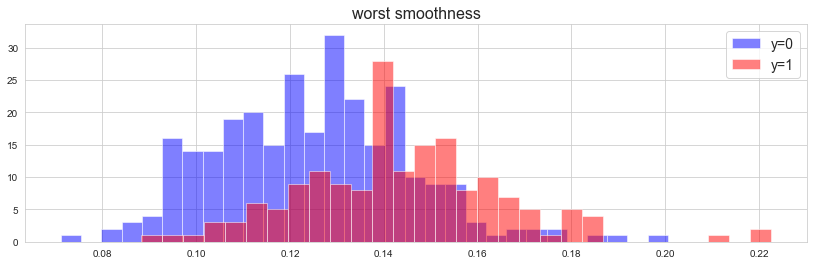

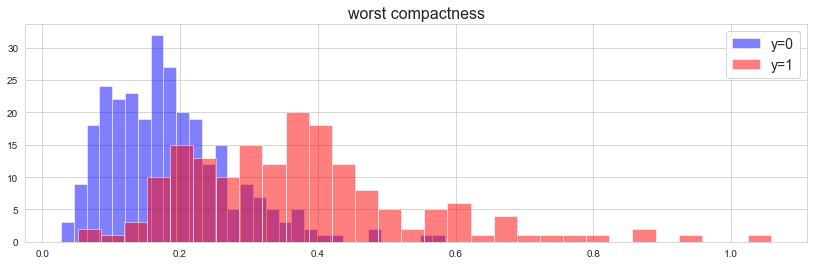

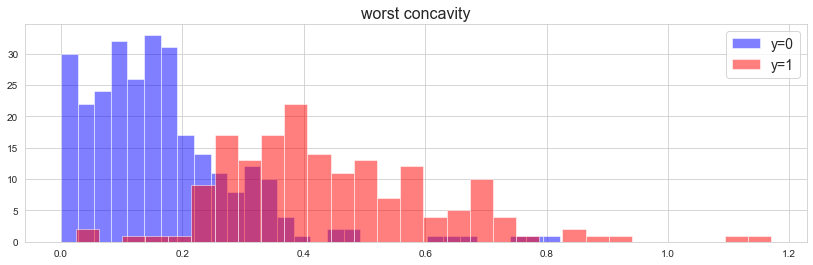

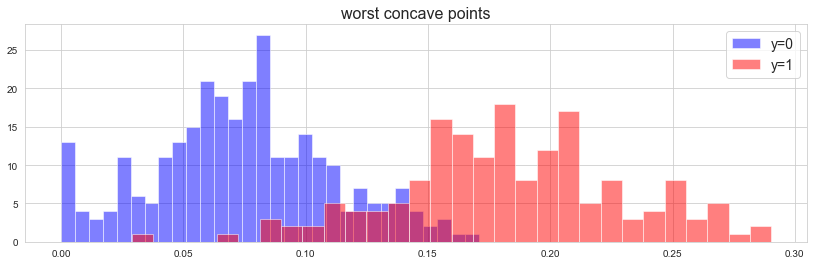

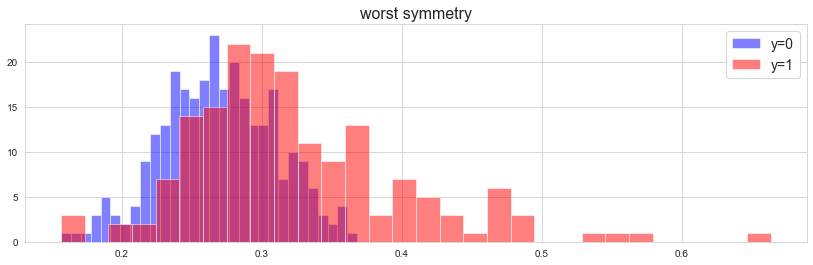

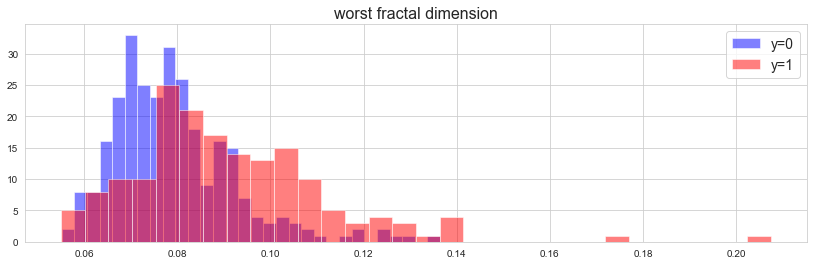

In [8]:
## histograms
for column in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.hist(X_train.loc[y_train==0, column], color='b', alpha=.5, label="y=0", bins=30)
    plt.hist(X_train.loc[y_train==1, column], color='r', alpha=.5, label="y=1", bins=30)
    plt.legend(fontsize=14)
    plt.title(column,fontsize=16)
    plt.show()

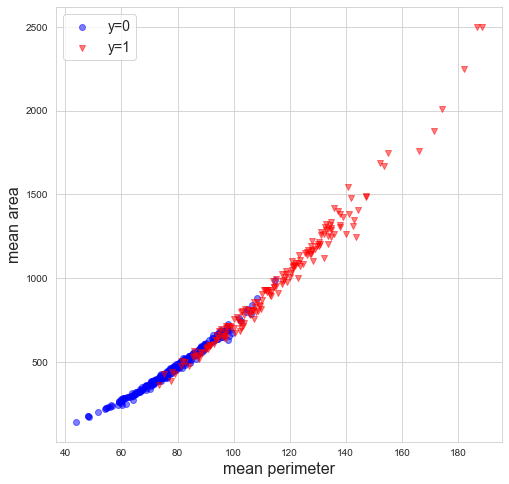

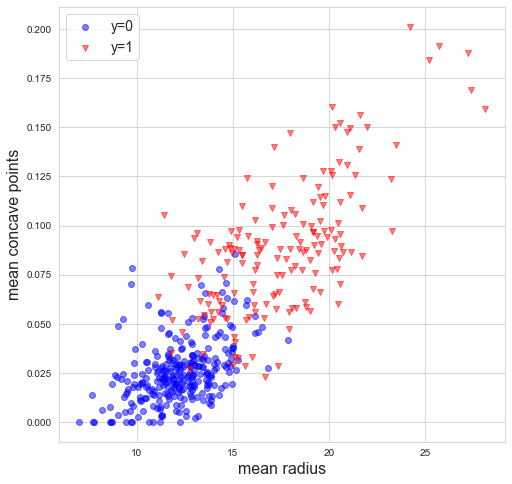

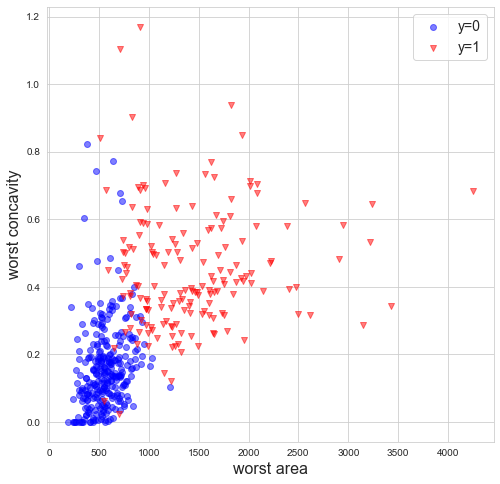

In [9]:
## sample scatter plots
plt.figure(figsize=(8,8))

plt.scatter(X_train.loc[y_train==0,'mean perimeter'], 
                X_train.loc[y_train==0,'mean area'],
                label="y=0",
                c='b',
                alpha=.5)
plt.scatter(X_train.loc[y_train==1,'mean perimeter'], 
                X_train.loc[y_train==1,'mean area'],
                label="y=1",
                c='r',
                marker='v',
                alpha=.5)

plt.legend(fontsize=14)
plt.xlabel("mean perimeter", fontsize=16)
plt.ylabel("mean area", fontsize=16)

plt.show()


plt.figure(figsize=(8,8))

plt.scatter(X_train.loc[y_train==0,'mean radius'], 
                X_train.loc[y_train==0,'mean concave points'],
                label="y=0",
                c='b',
                alpha=.5)
plt.scatter(X_train.loc[y_train==1,'mean radius'], 
                X_train.loc[y_train==1,'mean concave points'],
                label="y=1",
                c='r',
                marker='v',
                alpha=.5)

plt.legend(fontsize=14)
plt.xlabel("mean radius", fontsize=16)
plt.ylabel("mean concave points", fontsize=16)

plt.show()


plt.figure(figsize=(8,8))

plt.scatter(X_train.loc[y_train==0,'worst area'], 
                X_train.loc[y_train==0,'worst concavity'],
                label="y=0",
                c='b',
                alpha=.5)
plt.scatter(X_train.loc[y_train==1,'worst area'], 
                X_train.loc[y_train==1,'worst concavity'],
                label="y=1",
                c='r',
                marker='v',
                alpha=.5)

plt.legend(fontsize=14)
plt.xlabel("worst area", fontsize=16)
plt.ylabel("worst concavity", fontsize=16)

plt.show()

##### 5. Making some logistic regression models

Using your exploratory histograms choose a few different features that seem to separate the malignant tumors from the benign. Make a separate logistic regression model regressing `y` on each feature you have chosen. For example if you choose mean radius, mean area and mean perimeter you would build three models:
- one regressing $y$ on mean radius,
- one regressing $y$ on mean area and
- one regressing $y$ on mean perimeter.

Of the models you build find the one with best avg. cv. of the perfomance metric you chose in 3.

#### Potential Answer

I built a model for each of the features, I provide results for prec, TPR and FPR.

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score

In [11]:
kfold = StratifiedKFold(5, shuffle=True, random_state=14235)

log_reg_tprs = np.zeros((5, len(X_train.columns)))
log_reg_fprs = np.zeros((5, len(X_train.columns)))
log_reg_precs = np.zeros((5, len(X_train.columns)))



i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_tt = X_train.iloc[train_index]
    X_ho = X_train.iloc[test_index]
    y_tt = y_train.iloc[train_index]
    y_ho = y_train.iloc[test_index]
    j = 0
    for c in X_train.columns:
        log_reg = LogisticRegression()
        
        log_reg.fit(X_tt[c].values.reshape(-1,1), y_tt.values)
        
        pred = log_reg.predict(X_ho[c].values.reshape(-1,1))
        
        conf_mat = confusion_matrix(y_ho.values, pred)
        
        log_reg_precs[i,j] = precision_score(y_ho.values, pred)
        log_reg_tprs[i,j] = conf_mat[1,1]/(conf_mat[1,0] + conf_mat[1,1])
        log_reg_fprs[i,j] = conf_mat[0,1]/(conf_mat[0,0] + conf_mat[0,1])
        j = j + 1
    i = i + 1

/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewosborne/

/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthewosborne/

In [12]:
print("TPR")
print("==============================")
print("The feature with the highest avg. cv TPR was",
          X_train.columns[np.argmax(np.mean(log_reg_tprs, axis=0))])
print("This feature produced a model with avg. cv. TPR of",np.round(np.max(np.mean(log_reg_tprs, axis=0)),4))
print()

print("FPR")
print("==============================")
print("The feature with the lowest avg. cv FPR was",
          X_train.columns[np.argmin(np.mean(log_reg_fprs, axis=0))])
print("This feature produced a model with avg. cv. FPR of",np.round(np.min(np.mean(log_reg_fprs, axis=0)),4))
print()

print("Precision")
print("==============================")
print("The feature with the highest avg. cv Precision was",
          X_train.columns[np.argmax(np.mean(log_reg_precs, axis=0))])
print("This feature produced a model with avg. cv. Precision of",np.round(np.max(np.mean(log_reg_precs, axis=0)),4))

TPR
The feature with the highest avg. cv TPR was worst perimeter
This feature produced a model with avg. cv. TPR of 0.8882

FPR
The feature with the lowest avg. cv FPR was mean smoothness
This feature produced a model with avg. cv. FPR of 0.0

Precision
The feature with the highest avg. cv Precision was worst concave points
This feature produced a model with avg. cv. Precision of 1.0


##### 6. A $k$NN model

Perform $5$-fold cross-validation to find the value of $k$ that optimizes your performance metric of choice.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
kfold = StratifiedKFold(5, shuffle=True, random_state=14235)

max_neighbors = 40

knn_tprs = np.zeros((5, max_neighbors))
knn_fprs = np.zeros((5, max_neighbors))
knn_precs = np.zeros((5, max_neighbors))



i = 0
for train_index, test_index in kfold.split(X_train, y_train.values):
    X_tt = X_train.iloc[train_index]
    X_ho = X_train.iloc[test_index]
    y_tt = y_train.iloc[train_index]
    y_ho = y_train.iloc[test_index]
    j = 0
    for k in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(k)
        knn.fit(X_tt.values, y_tt.values)
        
        pred = knn.predict(X_ho.values)
        
        knn_precs[i,j] = precision_score(y_ho.values, pred)
        conf_mat = confusion_matrix(y_ho.values, pred)
        
        knn_tprs[i,j] = conf_mat[1,1]/(conf_mat[1,0] + conf_mat[1,1])
        knn_fprs[i,j] = conf_mat[0,1]/(conf_mat[0,0] + conf_mat[0,1])
        j = j + 1
    i = i + 1

In [15]:
print("TPR")
print("==============================")
print("The number of neighbors with the highest avg. cv TPR was",
          range(1,max_neighbors+1)[np.argmax(np.mean(knn_tprs, axis=0))])
print("This feature produced a model with avg. cv. TPR of",np.round(np.max(np.mean(knn_tprs, axis=0)),4))
print()

print("FPR")
print("==============================")
print("The number of neighbors with the lowest avg. cv FPR was",
          range(1,max_neighbors+1)[np.argmin(np.mean(knn_fprs, axis=0))])
print("This feature produced a model with avg. cv. FPR of",np.round(np.min(np.mean(knn_fprs, axis=0)),4))
print()

print("Precision")
print("==============================")
print("The number of neighbors with the highest avg. cv Precision was",
          range(1,max_neighbors+1)[np.argmax(np.mean(knn_precs, axis=0))])
print("This feature produced a model with avg. cv. Precision of",np.round(np.max(np.mean(knn_precs, axis=0)),4))

TPR
The number of neighbors with the highest avg. cv TPR was 5
This feature produced a model with avg. cv. TPR of 0.8824

FPR
The number of neighbors with the lowest avg. cv FPR was 2
This feature produced a model with avg. cv. FPR of 0.014

Precision
The number of neighbors with the highest avg. cv Precision was 2
This feature produced a model with avg. cv. Precision of 0.974


##### 7. Choose a model

Choose a model from the ones you tested. Write down what you chose below.

##### Sample Solution

I chose the knn model with $k=5$ neighbors.

##### 8. Interpreting your model

Common questions for diagnostic models concern estimating the probability that an individual does or does not have a disease if the model says (or does not say) they have one. We can estimate such a statistic using Bayes' rule.

$$
P\left(\text{Has Cancer} | \text{Classified } 1\right)
$$

$$
= \frac{P\left(\text{Classified } 1 | \text{Has Cancer} \right) P\left( \text{Has Cancer}  \right)}{P\left(\text{Classified } 1 | \text{Has Cancer} \right) P\left( \text{Has Cancer}  \right) + P\left(\text{Classified } 1 | \text{Does Not Have Cancer} \right) P\left( \text{Does Not Have Cancer}  \right)},
$$

similarly

$$
P\left(\text{Has Cancer} | \text{Classified } 0\right)
$$

$$
= \frac{P\left(\text{Classified } 0 | \text{Has Cancer} \right) P\left( \text{Has Cancer}  \right)}{P\left(\text{Classified } 0 | \text{Has Cancer} \right) P\left( \text{Has Cancer}  \right) + P\left(\text{Classified } 0 | \text{Does Not Have Cancer} \right) P\left( \text{Does Not Have Cancer}  \right)},
$$

We can estimate $P\left(\text{Classified } 1 | \text{Has Cancer} \right)$ with the true positive rate and we can estimate $P(\text{Has Cancer})$ or $P(\text{Does Not Have Cancer})$ using the rates from the data.

Estimate the true positive and true negative rates for your classifier using cross-validation. Then estimate $P\left(\text{Has Cancer} | \text{Classified } 1\right)$ and $P\left(\text{Has Cancer} | \text{Classified } 0\right)$ for your classifier.

##### Sample Solution

In [16]:
kfold = StratifiedKFold(5, shuffle=True, random_state=14235)

tprs = []
tnrs = []
fprs = []
fnrs = []
has_cancer = []
no_cancer = []



for train_index, test_index in kfold.split(X_train, y_train):
    X_tt = X_train.iloc[train_index]
    X_ho = X_train.iloc[test_index]
    y_tt = y_train.iloc[train_index]
    y_ho = y_train.iloc[test_index]
    
    knn = KNeighborsClassifier(5)
    
    knn.fit(X_tt.values, y_tt)
    pred = knn.predict(X_ho.values)
    
    conf_mat = confusion_matrix(y_ho.values, pred)
    
    tprs.append(conf_mat[1,1]/(conf_mat[1,0] + conf_mat[1,1]))
    tnrs.append(conf_mat[0,0]/(conf_mat[0,0] + conf_mat[0,1]))
    fprs.append(conf_mat[0,1]/(conf_mat[0,0] + conf_mat[0,1]))
    fnrs.append(conf_mat[1,0]/(conf_mat[1,0] + conf_mat[1,1]))
    
    has_cancer.append(np.sum(y_ho==1)/len(y_ho))
    no_cancer.append(np.sum(y_ho==0)/len(y_ho))
    
tprs = np.array(tprs)
tnrs = np.array(tnrs)
fnrs = np.array(fnrs)
fprs = np.array(fprs)

has_cancer = np.array(has_cancer)
no_cancer = np.array(no_cancer)

In [17]:
p_has_cancer_given_1 = tprs*has_cancer/(tprs*has_cancer + fprs*no_cancer)
p_has_cancer_given_0 = fnrs*has_cancer/(fnrs*has_cancer + tnrs*no_cancer)

In [18]:
print("If our classifier says a patient has cancer, we estimate",
      "a", np.round(np.mean(p_has_cancer_given_1),5),
      "probability that they actually have cancer.")

print()
print()

print("If our classifier says a patient does not have cancer, we estimate",
      "a", np.round(np.mean(p_has_cancer_given_0),5),
      "probability that they actually do have cancer.")

If our classifier says a patient has cancer, we estimate a 0.93394 probability that they actually have cancer.


If our classifier says a patient does not have cancer, we estimate a 0.06716 probability that they actually do have cancer.


--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)